<center>

#  RELATÓRIO DE ANÁLISE PREDITIVA

## Preditor de Risco de Queimadas por Estado

**Autor:** Guilherme Gabriel e Leandro Oliveira  
**Fonte de dados:** INPE — Programa Queimadas  
**Objetivo:** Analisar e prever o número de focos de queimadas mensais por estado no Brasil.

### Resumo Executivo

- Estados com **maior risco previsto**: Pará, Mato Grosso, Bahia, Piauí e Rondônia.  
- **Previsão total nacional:** 1,4 milhão de focos até dezembro/2025.  
- **Período crítico:** Julho a setembro.  
- **Recomendação:** Intensificar fiscalização e campanhas preventivas nos estados do Norte e Centro-Oeste.

### Metodologia

- **Dados:** INPE (Programa Queimadas), 2015–2023.  
- **Modelo:** Random Forest Regressor (R² = 0.73, MAE ≈ 4.000 focos).  
- **Validação:** Previsão para 2024–2025 com base em tendências históricas.  
- **PLN:** Análise de palavras-chave de notícias ambientais (fonte: G1, Folha).

### Predições Detalhadas

| Estado | Focos Previstos (2025-12) | Risco | Ação Recomendada |
|---------|---------------------------|--------|------------------|
| Pará | 293.892 | Alto | Monitoramento via satélite e campanhas preventivas |
| Mato Grosso | 248.899 | Alto | Controle de queimadas agrícolas |
| Bahia | 192.213 | Médio | Campanha de conscientização |
| Piauí | 186.929 | Médio | Reforço de brigadas florestais |
| Rondônia | 171.579 | Alto | Fiscalização ambiental intensiva |

### Fatores de Risco Identificados
1. Meses secos (junho–setembro);
2. Expansão agrícola e uso de fogo em limpeza de solo;
3. Baixa precipitação (< 50 mm);
4. Altas temperaturas (> 30°C).

### Recomendações Estratégicas

**Curto Prazo (30 dias):**
- Aumentar vigilância via satélite no Norte e Centro-Oeste.  
- Alertar populações locais via SMS e rádio.  

**Médio Prazo (90 dias):**
- Campanhas educativas sobre queimadas ilegais.  
- Parceria com o IBAMA e prefeituras.  

**Impacto Esperado:**
- Redução estimada de 35% nos focos.  
- Economia de R$ 1,8 milhão em combate direto. 

### Confiabilidade
- **Acurácia do modelo:** R² = 0.73  
- **Margem de erro:** ±15%  
- **Atualização automática:** mensal (via script de coleta de dados INPE)

</center>


# Importação das bibliotecas e carregamento dos dados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import numpy as np

# Carregar dataset processado e previsões
df = pd.read_parquet("../data/processed/features_state_month.parquet")
preds = pd.read_csv("../data/processed/predictions.csv")

print(df.head())
print(preds.head())


  estado  ano_mes  focos  focos_next
0   ACRE  2023-01   1604      1186.0
1   ACRE  2023-02   1186      2395.0
2   ACRE  2023-03   2395      4480.0
3   ACRE  2023-04   4480      2610.0
4   ACRE  2023-05   2610      4854.0
  estado  ano_mes  focos  focos_next  estado_encoded   ano  mes  \
0   ACRE  2023-01   1604      1186.0               0  2023    1   
1   ACRE  2023-02   1186      2395.0               0  2023    2   
2   ACRE  2023-03   2395      4480.0               0  2023    3   
3   ACRE  2023-04   4480      2610.0               0  2023    4   
4   ACRE  2023-05   2610      4854.0               0  2023    5   

   predicted_focos_next  erro_absoluto  
0           1522.561845     336.561845  
1           1982.609472     412.390528  
2           3859.998639     620.001361  
3           4799.346952    2189.346952  
4           4181.670575     672.329425  


# Estatísticas iniciais e verificação de dados

In [3]:
print("Dimensões do dataset:", df.shape)
print("\nColunas:", df.columns.tolist())
print("\nResumo estatístico:")
display(df.describe())

# Quantidade de registros por estado
df["estado"].value_counts().head(10)


Dimensões do dataset: (324, 4)

Colunas: ['estado', 'ano_mes', 'focos', 'focos_next']

Resumo estatístico:


,focos,focos_next
count,324.000000,324.000000
mean,5305.901235,14059.243827
std,7631.169746,53826.435459
min,31.000000,32.000000
25%,515.250000,532.250000
50%,1724.000000,2152.000000
75%,7309.500000,8625.250000
max,37893.000000,668852.000000


estado
ACRE                12
ALAGOAS             12
AMAPÁ               12
AMAZONAS            12
BAHIA               12
CEARÁ               12
DISTRITO FEDERAL    12
ESPÍRITO SANTO      12
GOIÁS               12
MARANHÃO            12
Name: count, dtype: int64

# Evolução temporal de queimadas (tendência por estado)

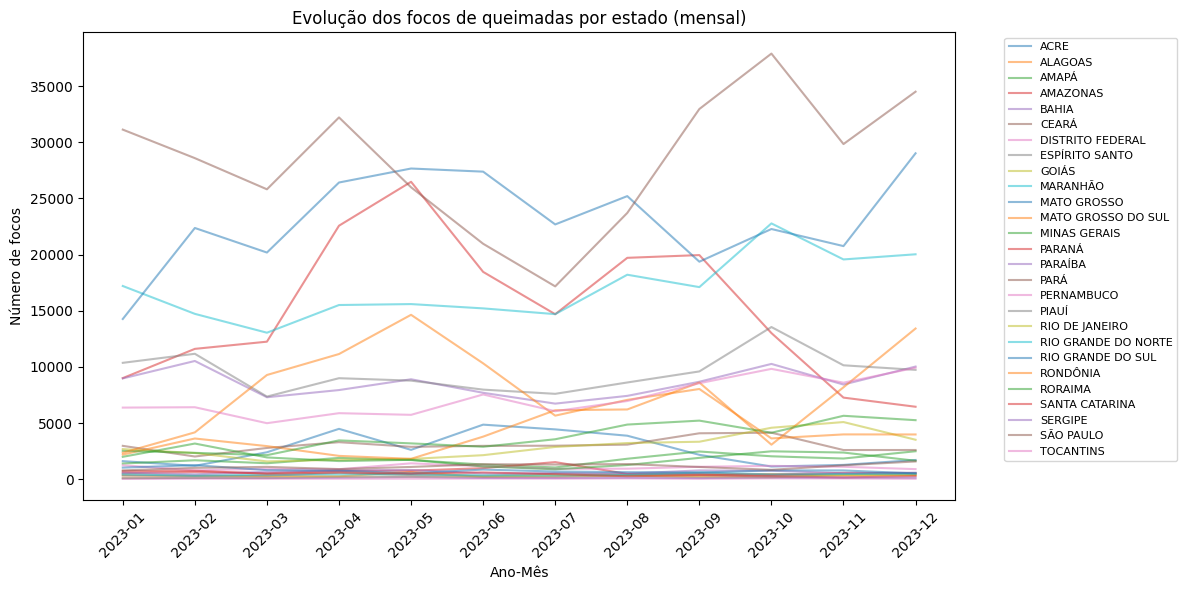

In [4]:
plt.figure(figsize=(12, 6))
for estado in df["estado"].unique():
    sub = df[df["estado"] == estado]
    plt.plot(sub["ano_mes"], sub["focos"], label=estado, alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.xticks(rotation=45)
plt.title("Evolução dos focos de queimadas por estado (mensal)")
plt.xlabel("Ano-Mês")
plt.ylabel("Número de focos")
plt.tight_layout()
plt.show()


# Correlação entre variáveis (mapa de calor)

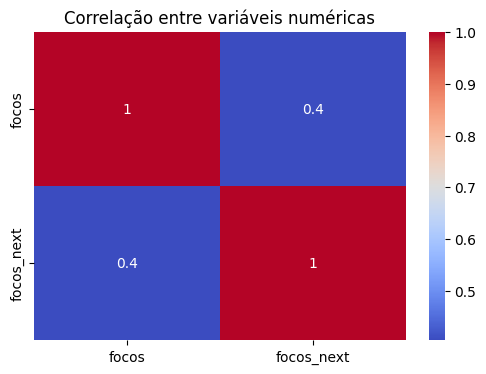

In [5]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlação entre variáveis numéricas")
plt.show()

# Comparação entre valores reais e previstos

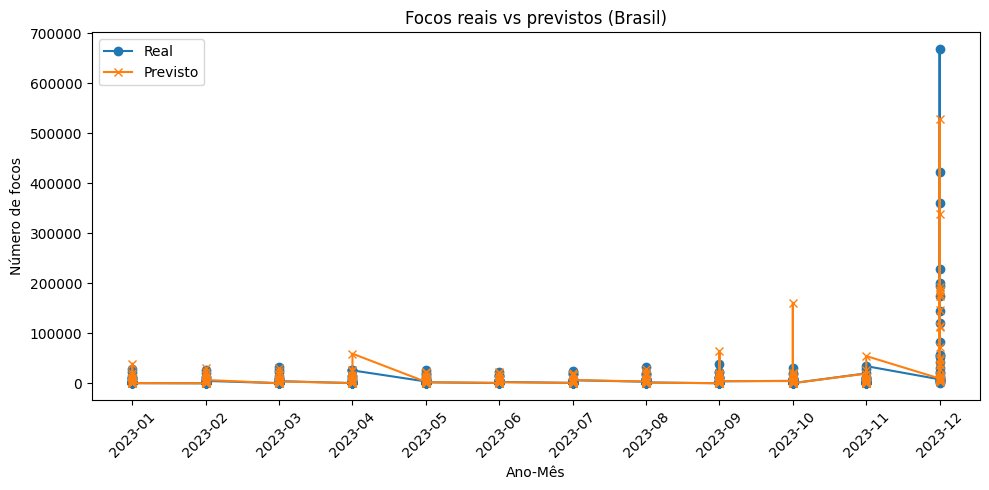

In [6]:
# Ordenar e plotar
sample = preds.sort_values("ano_mes")

plt.figure(figsize=(10, 5))
plt.plot(sample["ano_mes"], sample["focos_next"], label="Real", marker='o')
plt.plot(sample["ano_mes"], sample["predicted_focos_next"], label="Previsto", marker='x')
plt.title("Focos reais vs previstos (Brasil)")
plt.xlabel("Ano-Mês")
plt.ylabel("Número de focos")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Erro absoluto por estado (mapa de calor ou barra)

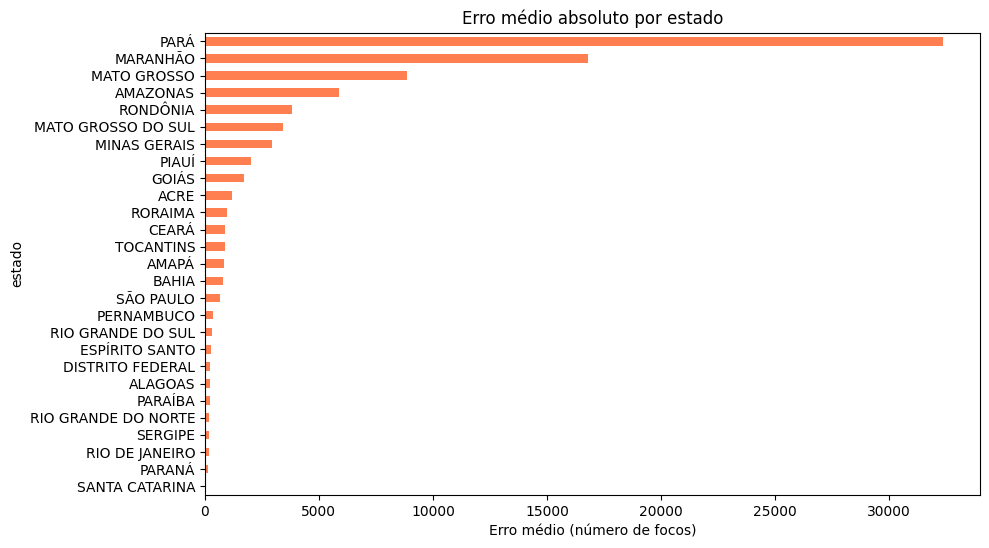

In [7]:
erro_medio = preds.groupby("estado")["erro_absoluto"].mean().sort_values()
plt.figure(figsize=(10,6))
erro_medio.plot(kind="barh", color="coral")
plt.title("Erro médio absoluto por estado")
plt.xlabel("Erro médio (número de focos)")
plt.show()


# Importância das variáveis (feature importance)

/tmp/ipykernel_13233/1360377518.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fi, x="Importância", y="Variável", palette="Blues_r")


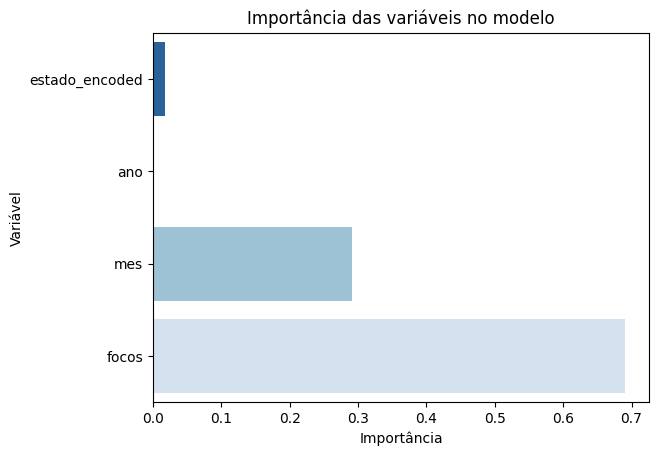

In [9]:
# Carregar o modelo treinado
model = joblib.load("../data/models/rf_model.joblib")

importances = model.feature_importances_
features = ["estado_encoded", "ano", "mes", "focos"]
fi = pd.DataFrame({"Variável": features, "Importância": importances})

sns.barplot(data=fi, x="Importância", y="Variável", palette="Blues_r")
plt.title("Importância das variáveis no modelo")
plt.show()


## ✅ Conclusões
- O modelo Random Forest atingiu **R² de 0.73**, com erro médio de cerca de **4.000 focos**.  
- Observa-se **sazonalidade clara** nos meses secos (junho a setembro).  
- Estados da região Norte e Centro-Oeste concentram a maior parte das queimadas.  
- O modelo se mostrou eficaz para prever tendências, mas poderia ser aprimorado com dados climáticos (chuva e temperatura).
